In [1]:
from data.data import load_data
from eda_plot.plotting import plot_hist, plot_scatter, plot_correlation,plot_box, plot_box_urban

df = load_data()

selected = [
    "Violent Rate",
    "Violent Count",
    "Population",
    "Civilian_labor_force",
    "Unemployment_rate",
    "Traffic_Count",
    "Urban_Influence_Code",
    "Metro"
]
df[selected].describe().T

,count,mean,std,min,25%,50%,75%,max
Violent Rate,1302.0,2.321621e+02,1.625504e+02,20.6,129.325,188.75,280.825,1297.4
Violent Count,1302.0,1.293089e+03,3.312531e+03,1.0,80.250,157.50,649.000,27611.0
Population,1302.0,3.133032e+05,5.349669e+05,4342.0,51057.250,90454.00,233325.000,2646816.0
Civilian_labor_force,1281.0,2.360752e+05,9.379835e+05,2204.0,24076.000,41652.00,120478.000,9853962.0
Unemployment_rate,1281.0,6.012022e+00,1.846850e+00,2.9,4.600,5.50,7.300,16.0
Traffic_Count,1220.0,1.358112e+06,2.650934e+06,0.0,168639.500,413263.00,1382096.750,33799451.0
Urban_Influence_Code,1269.0,2.952719e+00,2.234862e+00,1.0,1.000,2.00,4.000,9.0
Metro,1269.0,6.193853e-01,4.857294e-01,0.0,0.000,1.00,1.000,1.0


In [2]:
# NA values

df[selected].isna().sum()

Violent Rate             0
Violent Count            0
Population               0
Civilian_labor_force    21
Unemployment_rate       21
Traffic_Count           82
Urban_Influence_Code    33
Metro                   33
dtype: int64

In [3]:
# Data types

df.dtypes

county_name              object
year                      int64
Population              float64
Index Count               int64
Index Rate              float64
Violent Count             int64
Violent Rate            float64
Property Count            int64
Property Rate           float64
Firearm Count           float64
Firearm Rate            float64
Civilian_labor_force    float64
Employed                float64
Unemployed              float64
Unemployment_rate       float64
Urban_Influence_Code    float64
Metro                   float64
Traffic_Count           float64
violent_crime_rate      float64
dtype: object

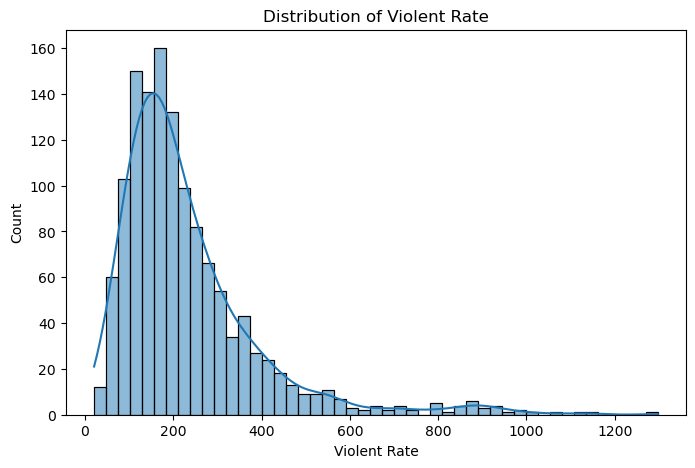

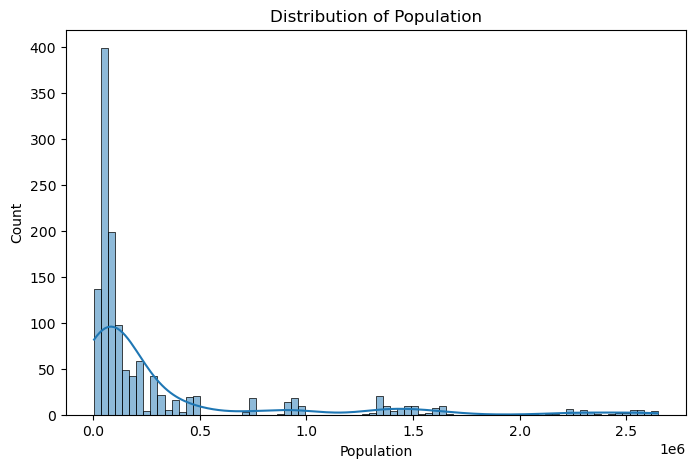

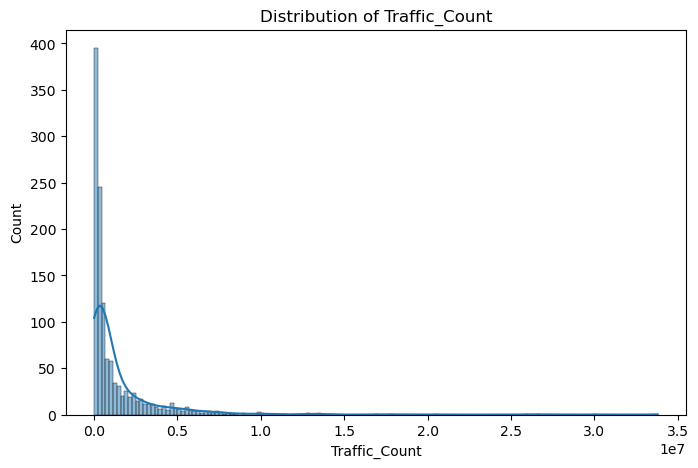

In [4]:
# Target variable (Histogram)
plot_hist(df, "Violent Rate")
plot_hist(df, "Population")
plot_hist(df, "Traffic_Count")

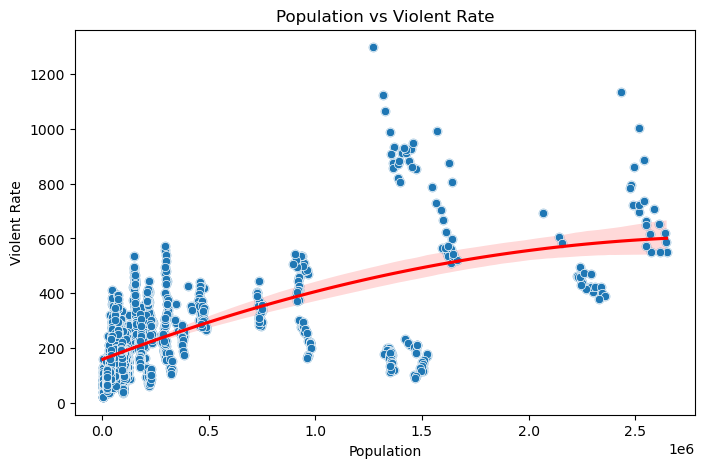

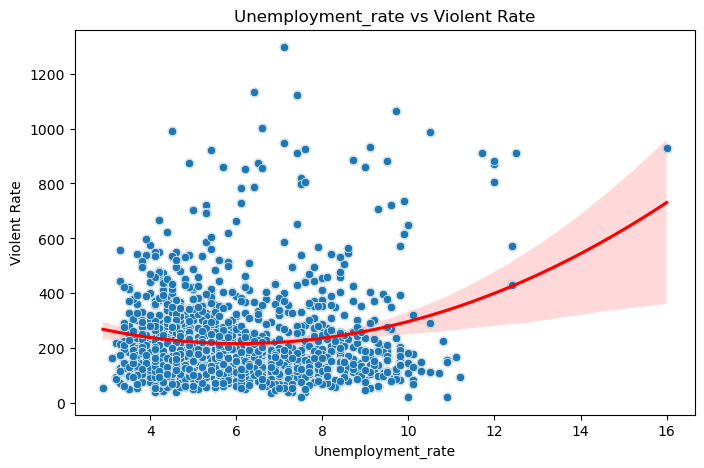

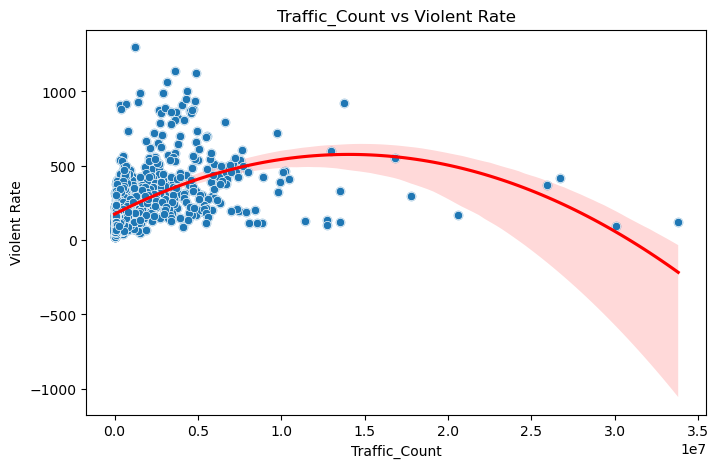

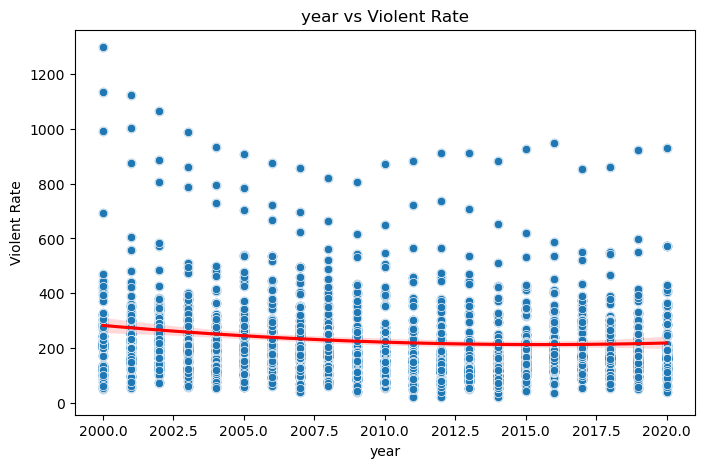

In [5]:
# Relationship between target and explanatory variables (Scatter Plot)

plot_scatter(df, "Population", "Violent Rate")
plot_scatter(df, "Unemployment_rate", "Violent Rate")
plot_scatter(df, "Traffic_Count", "Violent Rate")
plot_scatter(df, "year", "Violent Rate")

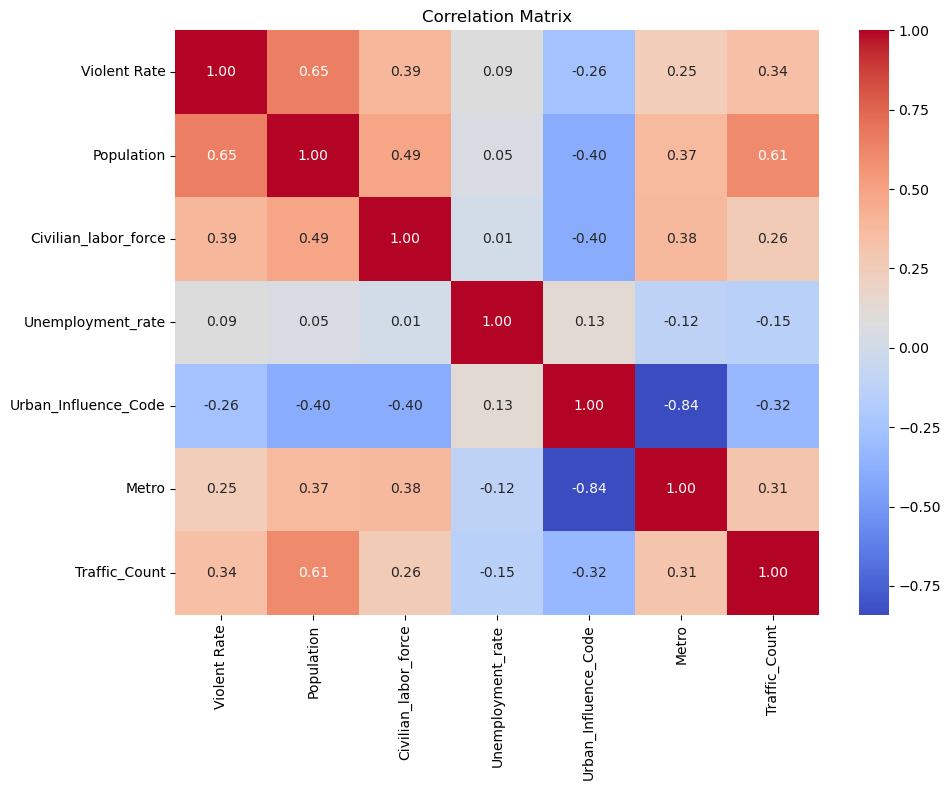

In [6]:
# Correlation matrix between each variables

plot_correlation(df)

c:\Users\Bronny\Final_Project\eda_plot\plotting.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y,palette=["skyblue", "salmon"])


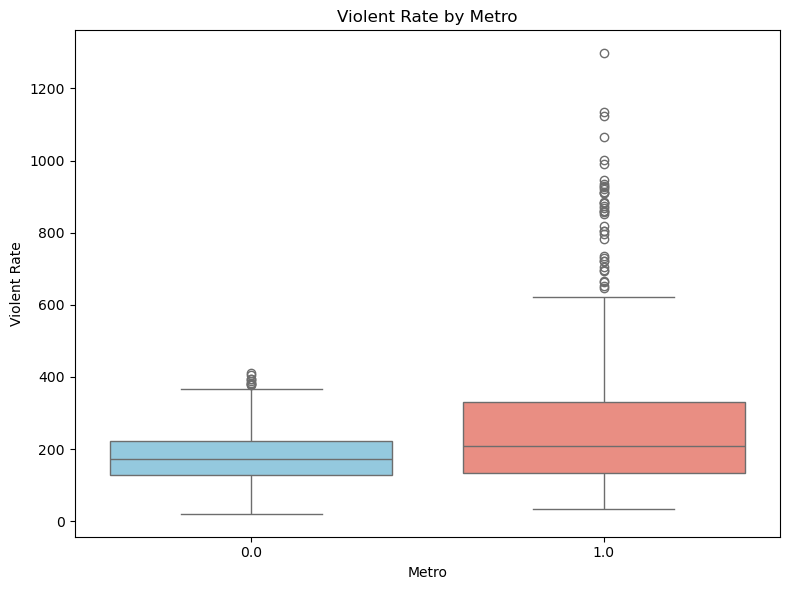

c:\Users\Bronny\Final_Project\eda_plot\plotting.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


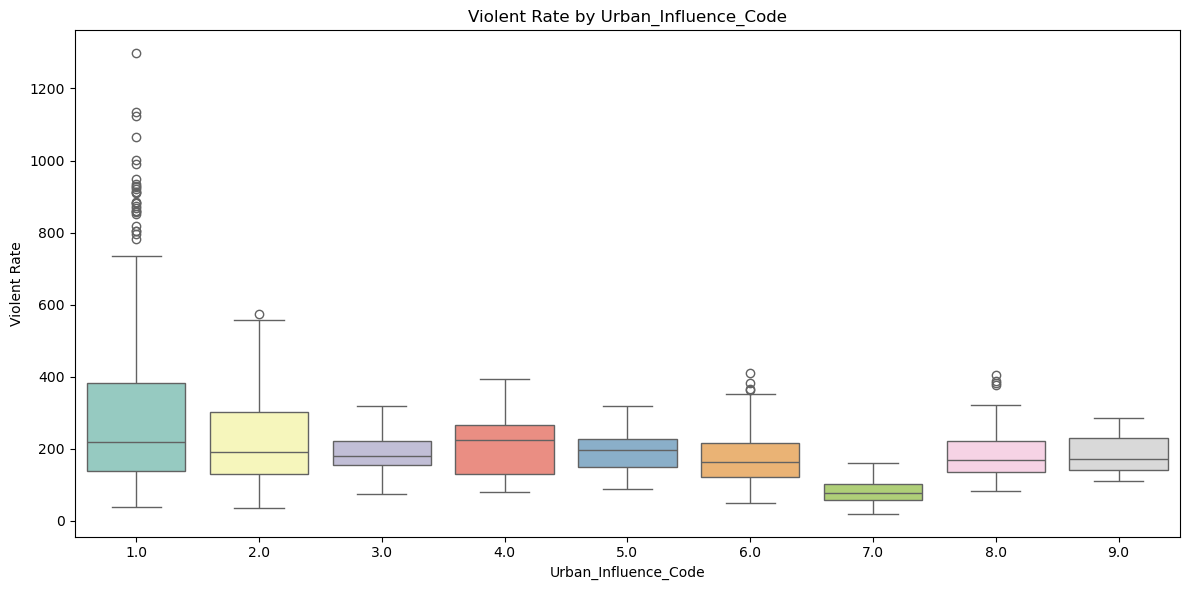

In [7]:
# Violent Rate by Metro & Urban Feature (Boxplot)
plot_box(df, "Metro", "Violent Rate")
plot_box_urban(df, "Urban_Influence_Code", "Violent Rate")


In [8]:

# Fill/Drop NA values
median = ["Civilian_labor_force", "Unemployment_rate", "Traffic_Count"]
for col in median:
    df[col] = df[col].fillna(df[col].median())

df1 = df.dropna(subset=["Urban_Influence_Code", "Metro"])

# Change data type
df1["Urban_Influence_Code"] = df1["Urban_Influence_Code"].astype("category")
df1["Metro"] = df1["Metro"].astype("category")


# Drop outliers
df1 = df1[df1["Unemployment_rate"] != df1["Unemployment_rate"].max()]

traffic = df1["Traffic_Count"].nlargest(4).index
df1 = df1.drop(traffic)

df1 = df1.reset_index(drop=True)

# Drop unused variables
drop = [
    "Property Count",
    "Property Rate",
    "Firearm Count",
    "Firearm Rate",
    "Employed",
    "Unemployed",
    "violent_crime_rate"
]

df1 = df1.drop(columns=drop)
df1.head()

# Save the file
df1.to_parquet("data/final_df.parquet", index=False)


C:\Users\Bronny\AppData\Local\Temp\ipykernel_43088\1573254031.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Urban_Influence_Code"] = df1["Urban_Influence_Code"].astype("category")
C:\Users\Bronny\AppData\Local\Temp\ipykernel_43088\1573254031.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Metro"] = df1["Metro"].astype("category")
